In [24]:
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
import numpy as np
import pandas as pd
from pathlib import Path
import glob
from scipy import stats
import h5py
import flammkuchen as fl

import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
from fig_2_helper import color_ipsi_cont
from fig_2_helper import assign_leading_fin, sort_ipsi_contra_arrays, reshape_feature_array

### Load data

In [27]:
save_figure_path = Path(r'\\portulab.synology.me\data\Kata\Figures_Paper\Figure_2\supp\suppl_4')

In [28]:
master_path = Path(r'\\portulab.synology.me\data\Kata\Processed_Data\tensor_data')
path_tensors = Path(master_path/ 'tensors' /'tensor_ipsi_contra_pos.h5')
path_features = Path(master_path/ 'features_ipsi_contra.csv')
master_path, path_features

(WindowsPath('//portulab.synology.me/data/Kata/Processed_Data/tensor_data'),
 WindowsPath('//portulab.synology.me/data/Kata/Processed_Data/tensor_data/features_ipsi_contra.csv'))

In [29]:
features = pd.read_csv(path_features)
features.head()

,Unnamed: 0.1,Unnamed: 0,exp,fish_id,bout_angle,cluster,frame_start,frame_end,bout_id_orig,mb_proba,max_eye_rot,max_eye_vergence,tail_direction,tail_duration,tail_peak_vigor,t_start,t_end,tail_osc,tail_time_1_peak,l_fin_time_1_peak,r_fin_time_1_peak,l_fin_duration,l_fin_peak_vigor,r_fin_duration,r_fin_peak_vigor,l_osc,r_osc,fin_fin_corr,fin_fin_lag,ipsi_amp_0,ipsi_amp_1,ipsi_amp_2,contra_amp_0,contra_amp_1,contra_amp_2,ipsi_t_0,contra_t_0,tail_t_0,ipsi_diff_0,ipsi_diff_1,ipsi_diff_2,contra_diff_0,contra_diff_1,contra_diff_2,ipsi_fin,leading_fin,tail_freq,l_fin_freqs,r_fin_freqs,tail_max_freq,l_fin_max_freqs,r_fin_max_freqs,l_start,l_end,r_start,r_end,ipsi_peak_vigor,contra_peak_vigor,ipsi_freqs,contra_freqs,ipsi_osc,contra_osc,ipsi_duration,contra_duration,ipsi_max_freqs,contra_max_freqs
0,0,0,13052024_visstim_2D_round,240513_f0,3.000171,0,18375,18410,78,0.806645,-0.239648,0.017505,1.0,26.0,0.038650,4.0,30.0,3.0,-1,35,10,27.0,0.164076,28.0,0.244681,3,4,-0.185579,-4,0.465832,0.676743,0.798017,0.263677,0.340697,0.267229,2.0,6.0,9.0,0.210910,0.121274,-0.179603,0.077020,-0.073468,NaN,1.0,1,0.121622,0.105263,0.109756,0.166667,0.166667,0.166667,0.0,27.0,0.0,28.0,0.244681,0.164076,0.109756,0.105263,4,3,28.0,27.0,0.166667,0.166667
1,1,1,13052024_visstim_2D_round,240513_f0,1.649302,0,19461,19484,80,1.000000,0.479035,0.016159,1.0,16.0,0.041724,2.0,18.0,3.0,-1,76,61,15.0,0.128555,19.0,0.163745,2,2,0.016278,-4,0.432741,0.283789,NaN,0.151052,0.296224,NaN,11.0,8.0,2.0,-0.148951,NaN,NaN,0.145172,NaN,NaN,1.0,0,0.058140,0.117647,0.119048,0.166667,0.166667,0.250000,0.0,15.0,7.0,26.0,0.163745,0.128555,0.119048,0.117647,2,2,19.0,15.0,0.250000,0.166667
2,2,2,13052024_visstim_2D_round,240513_f0,-0.861132,0,19661,19689,81,1.000000,-1.120168,0.011039,1.0,18.0,0.039274,4.0,22.0,2.0,-1,40,15,16.0,0.184779,27.0,0.219439,2,3,-0.051860,-4,0.369907,0.615071,0.620835,0.431473,0.348294,NaN,3.0,7.0,9.0,0.245164,0.005763,NaN,-0.083179,NaN,NaN,1.0,1,0.097561,0.115385,0.104167,0.166667,0.166667,0.125000,4.0,20.0,0.0,27.0,0.219439,0.184779,0.104167,0.115385,3,2,27.0,16.0,0.125000,0.166667
3,3,3,13052024_visstim_2D_round,240513_f0,0.870591,0,20257,20292,84,1.000000,-2.662451,0.032388,1.0,26.0,0.035878,7.0,33.0,4.0,-1,117,56,16.0,0.198009,35.0,0.209418,2,4,-0.173340,4,0.395376,0.569168,0.547268,0.523427,0.534200,NaN,11.0,23.0,7.0,0.173791,-0.021899,-0.255052,0.010773,NaN,NaN,1.0,1,0.114286,0.117647,0.117647,0.166667,0.166667,0.125000,19.0,35.0,0.0,35.0,0.209418,0.198009,0.117647,0.117647,4,2,35.0,16.0,0.125000,0.166667
4,4,4,13052024_visstim_2D_round,240513_f0,2.231631,0,20824,20859,86,1.000000,-1.192489,-0.001899,1.0,22.0,0.035649,9.0,31.0,3.0,-1,40,56,23.0,0.185247,22.0,0.220615,3,3,-0.040449,-4,0.567504,0.606922,0.358065,0.251714,0.370987,0.503003,11.0,7.0,9.0,0.039418,-0.248857,NaN,0.119273,0.132016,NaN,1.0,0,0.108108,0.116667,0.103448,0.166667,0.125000,0.125000,0.0,23.0,6.0,28.0,0.220615,0.185247,0.103448,0.116667,3,3,22.0,23.0,0.125000,0.125000


In [30]:
leading_fin = features.leading_fin.values
ipsi_fin = features.ipsi_fin.values
clusters = features.cluster

In [31]:
leading_fin_ipsi_contra = assign_leading_fin(leading_fin, ipsi_fin)
print(leading_fin_ipsi_contra)

[0. 1. 0. ... 0. 0. 1.]


In [32]:
leading_fin_ipsi_contra[leading_fin ==2] = 2

In [33]:
### tail, fin 1, fin 2
traces =  fl.load(path_tensors)

tail = traces[:, 0, :]
ipsi_fin_ = traces[:, 1, :]
contra_fin_ = traces[:, 2, :]

In [34]:
l_feature_vector_array = fl.load(master_path/ 'peaks_valleys'/  'l_feature_vector_array.h5')
r_feature_vector_array = fl.load(master_path/ 'peaks_valleys'/  'r_feature_vector_array.h5')

In [35]:
l_reshaped_array, l_peaks_a_array, l_peaks_i_array, l_valleys_a_array, l_valleys_i_array = reshape_feature_array(l_feature_vector_array)
r_reshaped_array, r_peaks_a_array, r_peaks_i_array, r_valleys_a_array, r_valleys_i_array = reshape_feature_array(r_feature_vector_array)

Reshaped array shape: (11063, 4, 9)
Reshaped array shape: (11063, 4, 9)


In [36]:
l_periods_array = fl.load(master_path/ 'features'/ 'l_full_beats.h5')
l_half_beats_array = fl.load(master_path/ 'features'/ 'l_half_beats.h5')
r_periods_array = fl.load(master_path/ 'features'/ 'r_full_beats.h5')
r_half_beats_array = fl.load(master_path/ 'features'/ 'r_half_beats.h5')

## Parameter settings

In [37]:
fwd = [0,1,2,3]
trn = [4,5,6]
esc = [7,8,9,10]

# Create masks for each cluster
fwd_mask = np.isin(clusters, fwd)
trn_mask = np.isin(clusters, trn)
esc_mask = np.isin(clusters, esc)

# Display the results
print("FWD Mask:", fwd_mask)
print("TRN Mask:", trn_mask)
print("ESC Mask:", esc_mask)

masks = [fwd_mask, trn_mask, esc_mask]

FWD Mask: [ True  True  True ... False  True  True]
TRN Mask: [False False False ...  True False False]
ESC Mask: [False False False ... False False False]


In [38]:
alph=0.5
size=1
cm_ = 1/2.54  # centimeters in inches
f_size =6
lw=0.5
dpi= 600

### Panel A

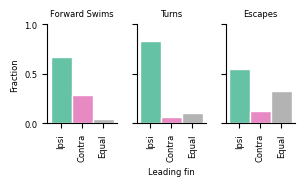

In [39]:
# Plotting
fsize = 10

fig, axes = plt.subplots(1, len(masks), figsize=(8*cm_,5*cm_), facecolor='None', sharex=True, sharey=True)
axes = axes.ravel()

for i, mask in enumerate(masks):
    filtered_data = leading_fin_ipsi_contra[mask]
    counts = pd.Series(filtered_data).value_counts().sort_index()
    total = len(filtered_data)
    counts_normalized = counts / total

    axes[i].bar(counts.index, counts_normalized, width=1, color=[color_ipsi_cont[0], color_ipsi_cont[1], color_ipsi_cont[2]], edgecolor='white')
    axes[i].set_xticks(np.arange(0, 3))
    axes[i].set_xticklabels(['Ipsi', 'Contra', 'Equal'], rotation=90, fontsize=f_size)

for ax in axes:
    ax.set_yticks(np.arange(0,1.01,0.5))
    ax.set_yticklabels(np.arange(0,1.01,0.5), fontsize=f_size)
    
axes[0].set_title('Forward Swims', fontsize=f_size)
axes[1].set_title('Turns', fontsize=f_size)
axes[2].set_title('Escapes', fontsize=f_size)
axes[1].set_xlabel('Leading fin', fontsize=f_size)
axes[0].set_ylabel('Fraction', fontsize=f_size)
axes[0].set_ylim(0,1)

sns.despine(top=True, right=True, left=False, bottom=False, offset=None, trim=False)
plt.tight_layout()
fig.savefig(save_figure_path/ 'leading_fin_cat.pdf', dpi=dpi)
fig.savefig(save_figure_path/ 'leading_fin_cat.png', dpi=dpi)

## Panel B

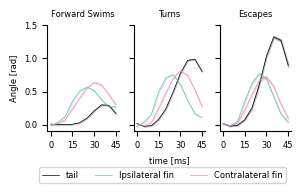

In [40]:

fig, axes = plt.subplots(1, len(masks), figsize=(8*cm_,3.5*cm_), facecolor='None', sharex=True, sharey=True)
axes = axes.ravel()

for i, mask in enumerate(masks):
    n_samples = tail.shape[0] 
    cut = 10 
    tail_select = tail[:n_samples,:cut][mask]

    # Calculate mean and standard error
    mean_line = np.mean(tail_select, axis=0)
    stderr = np.std(tail_select, axis=0) / np.sqrt(tail_select.shape[0])
    axes[i].plot(mean_line, c='k',  alpha=1, label='tail', lw=lw)
    # Plot confidence interval as a filled area
    axes[i].fill_between(np.arange(0,cut,1), 
                     mean_line - stderr, 
                     mean_line + stderr, 
                     color='k', 
                     alpha=0.2)
    
    ipsi_select = ipsi_fin_[:n_samples,:cut][mask]
    # Calculate mean and standard error
    mean_line = np.mean(ipsi_select, axis=0)
    stderr = np.std(ipsi_select, axis=0) / np.sqrt(ipsi_select.shape[0])
    axes[i].plot(mean_line, c=color_ipsi_cont[0],  alpha=1, label='Ipsilateral fin', lw=lw)
    # Plot confidence interval as a filled area
    axes[i].fill_between(np.arange(0,cut,1), 
                     mean_line - stderr, 
                     mean_line + stderr, 
                     color=color_ipsi_cont[0], 
                     alpha=0.2)
    
    contra_select = contra_fin_[:n_samples,:cut][mask]
    # Calculate mean and standard error
    mean_line = np.mean(contra_select, axis=0)
    stderr = np.std(contra_select, axis=0) / np.sqrt(contra_select.shape[0])
    axes[i].plot(mean_line, c=color_ipsi_cont[1],  alpha=1, label='Contralateral fin', lw=lw)
    # Plot confidence interval as a filled area
    axes[i].fill_between(np.arange(0,cut,1), 
                     mean_line - stderr, 
                     mean_line + stderr, 
                     color=color_ipsi_cont[1], 
                     alpha=0.2)

for ax in axes:
    ax.set_yticks(np.arange(0,1.51,0.5))
    ax.set_yticklabels(np.arange(0,1.51,0.5), fontsize=f_size)
    ax.set_xticks(np.arange(0,cut,3))
    ax.set_xticklabels(np.arange(0,cut,3)*5, fontsize=f_size)
    ax.set_xlabel(' ', fontsize=f_size)  
    
axes[1].set_xlabel('time [ms]', fontsize=f_size)  
axes[0].set_ylabel('Angle [rad]', fontsize=f_size)
axes[0].set_title('Forward Swims', fontsize=f_size)
axes[1].set_title('Turns', fontsize=f_size)
axes[2].set_title('Escapes', fontsize=f_size)

for ax in axes:
    ax.tick_params(axis='both', which='major', labelsize=f_size)
axes[2].legend(fontsize=f_size, loc='upper center', bbox_to_anchor=(-0.8, -0.3), ncol=3)
sns.despine(top=True, right=True, left=False, bottom=False, offset=None, trim=False)
plt.tight_layout()

fig.savefig(save_figure_path / 'exp_traces_starting_fwd_turn_escapes.pdf', dpi=dpi)
fig.savefig(save_figure_path / 'exp_traces_starting_fwd_turn_escapes.png', dpi=dpi)

## Panel C

In [41]:
ipsi_peaks_a_array_0, contra_peaks_a_array_0 = sort_ipsi_contra_arrays(l_peaks_a_array[:,0], r_peaks_a_array[:,0], ipsi_fin)
ipsi_peaks_a_array_1, contra_peaks_a_array_1 = sort_ipsi_contra_arrays(l_peaks_a_array[:,1], r_peaks_a_array[:,1], ipsi_fin)
ipsi_peaks_a_array_2, contra_peaks_a_array_2 = sort_ipsi_contra_arrays(l_peaks_a_array[:,2], r_peaks_a_array[:,2], ipsi_fin)
ipsi_peaks_a_array_3, contra_peaks_a_array_3 = sort_ipsi_contra_arrays(l_peaks_a_array[:,3], r_peaks_a_array[:,3], ipsi_fin)

data_ipsis = np.stack([ipsi_peaks_a_array_0, ipsi_peaks_a_array_1, ipsi_peaks_a_array_2, ipsi_peaks_a_array_3]).T
data_contras = np.stack([contra_peaks_a_array_0, contra_peaks_a_array_1, contra_peaks_a_array_2, contra_peaks_a_array_3]).T

data_ipsis.shape

(11063, 4)

In [42]:
cycles=3
width = 0.35  # Width of the bars
error_kw = {'elinewidth': lw, 'capsize': 3}  # Adjust elinewidth as desired

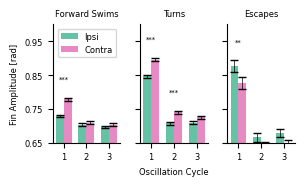

In [43]:

fig, axes = plt.subplots(1, len(masks),  figsize=(8*cm_,5*cm_), facecolor='None', sharex=True, sharey=True)
axes = axes.ravel()

for i, mask in enumerate(masks):
    data_ipsi = data_ipsis[mask][:, :cycles]
    data_contra = data_contras[mask][:, :cycles]
    
    # Compute means and standard errors
    mean_ipsi = np.nanmean(data_ipsi, axis=0)
    stderr_ipsi = np.nanstd(data_ipsi, axis=0) / np.sqrt(data_ipsi.shape[0])
    
    mean_contra = np.nanmean(data_contra, axis=0)
    stderr_contra = np.nanstd(data_contra, axis=0) / np.sqrt(data_contra.shape[0])
    
    x = np.arange(cycles)
    
    # Plot ipsilateral data with SEM error bars
    axes[i].bar(x - width/2, mean_ipsi, width, yerr=stderr_ipsi, label='Ipsi', color=color_ipsi_cont[0], error_kw=error_kw)
    
    # Plot contralateral data with SEM error bars
    axes[i].bar(x + width/2, mean_contra, width, yerr=stderr_contra, label='Contra', color=color_ipsi_cont[1], error_kw=error_kw)
    
    # Compute and annotate statistics (paired t-test)
    t_values, p_values = stats.ttest_rel(data_ipsi, data_contra, axis=0, nan_policy='omit')
    
    for j, (t, p) in enumerate(zip(t_values, p_values)):
        max_y = max(mean_ipsi[j] + stderr_ipsi[j], mean_contra[j] + stderr_contra[j])
        
        if p < 0.001:
            axes[i].text(j, max_y + 0.05, '***', fontsize=f_size*0.8, ha='center', color='black')
        elif p < 0.01:
            axes[i].text(j, max_y + 0.05, '**', fontsize=f_size*0.8, ha='center', color='black')
        elif p < 0.05:
            axes[i].text(j, max_y + 0.05, '*', fontsize=f_size*0.8, ha='center', color='black')

axes[0].set_ylabel('Fin Amplitude [rad]', fontsize=f_size)
axes[0].set_title('Forward Swims', fontsize=f_size)
axes[1].set_title('Turns', fontsize=f_size)
axes[2].set_title('Escapes', fontsize=f_size)

for ax in axes:
    ax.set_xticks(x)
    ax.set_xticklabels(np.arange(1, cycles + 1), fontsize=f_size)

axes[0].set_yticks(np.arange(0.65, 1.01, 0.1))
axes[0].set_yticklabels(np.round(np.arange(0.65, 1.01, 0.1),2), fontsize=f_size)
# axes[0].set_xlabel('Oscillation Cycle', fontsize=f_size)
axes[1].set_xlabel('Oscillation Cycle', fontsize=f_size)
axes[0].set_ylim(0.65,1)
axes[0].legend(fontsize=f_size)  # Add legend to the first subplot
sns.despine(top=True, right=True, left=False, bottom=False, offset=None, trim=False)
plt.tight_layout()

# Save the figure
fig.savefig(save_figure_path / 'bar_amp_osc_cycles_ipsi_cont_turn_cluster_t.pdf', dpi=dpi)
fig.savefig(save_figure_path / 'bar_amp_osc_cycles_ipsi_cont_turn_cluster_t.png', dpi=dpi)


## Panel D

In [44]:
l_periods_array = l_periods_array*1000
r_periods_array = r_periods_array*1000

dt = 0.005
bins = np.arange(0, 100, 10)

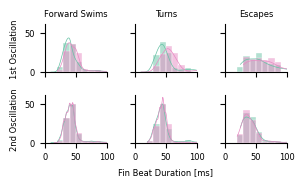

In [45]:

fig, axes = plt.subplots(2, len(masks), figsize=(8*cm_,5*cm_), facecolor='None', sharex=True, sharey=True)
axes = axes.ravel()

for ind, mask in enumerate(masks):
    
    l_array = l_periods_array[mask]
    r_array = r_periods_array[mask]
    i_fin = ipsi_fin[mask]
    
    data_ipsi = np.concatenate([l_array[i_fin ==0][:, 0], r_array[i_fin==1][:, 0]])
    data_contra = np.concatenate([l_array[i_fin ==1][:, 0], r_array[i_fin ==0][:, 0]])
    ax=sns.histplot(data=data_ipsi, color=color_ipsi_cont[0],  bins=bins, stat='percent', kde=True, alpha=alph,  edgecolor='w', ax=axes[ind],label= 'ipsilateral')
    for line in ax.get_lines():
        line.set_linewidth(lw)  # Set the desired line width here
    ax = sns.histplot(data=data_contra, color= color_ipsi_cont[1],  bins=bins, stat='percent', kde=True, alpha=alph, edgecolor='w', ax=axes[ind], label= 'contralateral')
    for line in ax.get_lines():
        line.set_linewidth(lw)  # Set the desired line width here
    data_ipsi = np.concatenate([l_array[i_fin ==0][:, 1], r_array[i_fin==1][:, 1]])
    data_contra = np.concatenate([l_array[i_fin ==1][:, 1], r_array[i_fin ==0][:, 1]])
    ax=sns.histplot(data=data_ipsi, color=color_ipsi_cont[0],  bins=bins, stat='percent', kde=True, alpha=alph,  edgecolor='w', ax=axes[3+ind],label= 'ipsilateral')
    for line in ax.get_lines():
        line.set_linewidth(lw)  # Set the desired line width here
    ax=sns.histplot(data=data_contra, color= color_ipsi_cont[1],  bins=bins, stat='percent', kde=True, alpha=alph, edgecolor='w', ax=axes[3+ind], label= 'contralateral')
    for line in ax.get_lines():    
        line.set_linewidth(lw)  # Set the desired line width here

axes[0].set_title('Forward Swims', fontsize=f_size)
axes[1].set_title('Turns', fontsize=f_size)
axes[2].set_title('Escapes', fontsize=f_size)

axes[-2].set_xlabel('Fin Beat Duration [ms]', fontsize=f_size)
axes[0].set_ylabel('1st Oscillation', fontsize=f_size)
axes[3].set_ylabel('2nd Oscillation', fontsize=f_size)

for ax in axes:
    ax.tick_params(axis='both', which='major', labelsize=f_size)

axes[0].set_xlim(0,100)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.tight_layout()

fig.savefig(save_figure_path/ 'peak_to_peak_fins_v2.pdf', dpi=dpi)
fig.savefig(save_figure_path/ 'peak_to_peak_fins_v2.png', dpi=dpi)